In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Load Dataset

In [2]:
data=pd.read_excel('Data_Train.xlsx')  # read the data
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Dimensions of Dataset

In [3]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)

print(data.isna().sum())

#printing the summary of data type
data.info() 


(10683, 11)
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ 

AS we see the total_stops & route columns has null value.

In [4]:
# Drop unneccesary column
data=data.drop(columns=['Additional_Info','Route'],axis=1)

In [5]:
#first remove duplicates & recheck the size
data.drop_duplicates(inplace=True)

print(data.shape)

(10463, 9)


From above counting or shape we see there are duplicates are presents that we removed

In [6]:
# Check the all columns name
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

# Statistical Summary

In [7]:
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
count,10463,10463,10463,10463,10463,10463,10463,10462,10463.000000
unique,12,44,5,6,222,1343,368,5,NaN
top,Jet Airways,6/06/2019,Delhi,Cochin,18:55,19:00,2h 50m,1 stop,NaN
freq,3700,490,4346,4346,233,412,544,5625,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9026.642454
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4624.653227
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5224.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8266.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12343.500000


Observations: 1) null vallues are present 2)we have categorical data type(object type)

In [8]:
# First lets deal with null values
# As we can not predict rout & total stops lets drop it
data.dropna(inplace = True)

In [9]:
# Now lets check again for the null values
print(data.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


In [10]:
print(data.shape)

(10462, 9)


Now null values are treated well lets move further for the data visulisation

# Data Visualization

# Univariate Plots

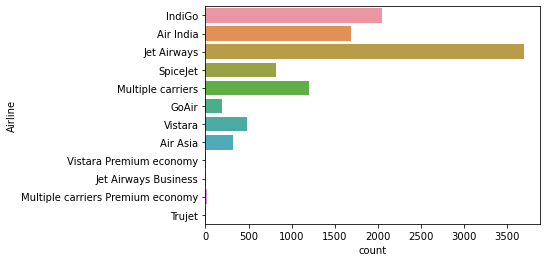

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [11]:
#plot each class frequency
sns.countplot(y='Airline',data=data)
plt.show()
print(data['Airline'].value_counts())

form thr graph we can see there are maximum airline flights are jet airways.

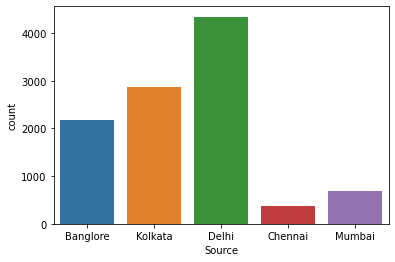

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64


In [12]:
#plot each class frequency
sns.countplot(x='Source',data=data)
plt.show()
print(data['Source'].value_counts())

We can see that the maximum source of flight is Delhi, then kolkata.

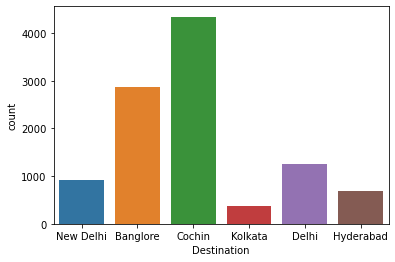

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [13]:
#plot each class frequency
sns.countplot(x='Destination',data=data)
plt.show()
print(data['Destination'].value_counts())

From graph we can see that the Cochin is destination where the maximum service ends

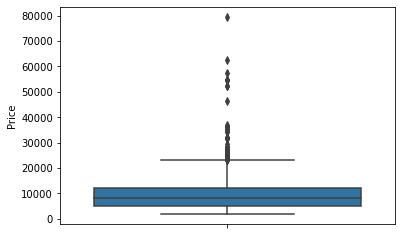

In [14]:
#plot each class frequency
sns.boxplot(y='Price',data=data)
plt.show()

as we see the the highest price of flight is almost 80000

# Bivariate Plot

<Figure size 720x432 with 0 Axes>

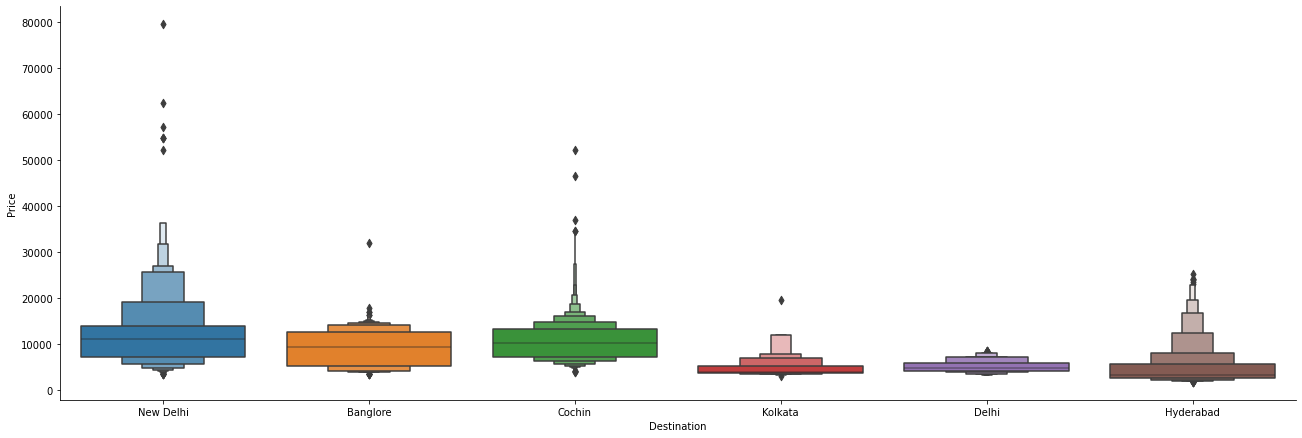

In [16]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='Destination', y ='Price', data = data, kind = "boxen", height = 6, aspect = 3)
plt.show()

From graph we can see that the maximum flight price for the New Delhi location.

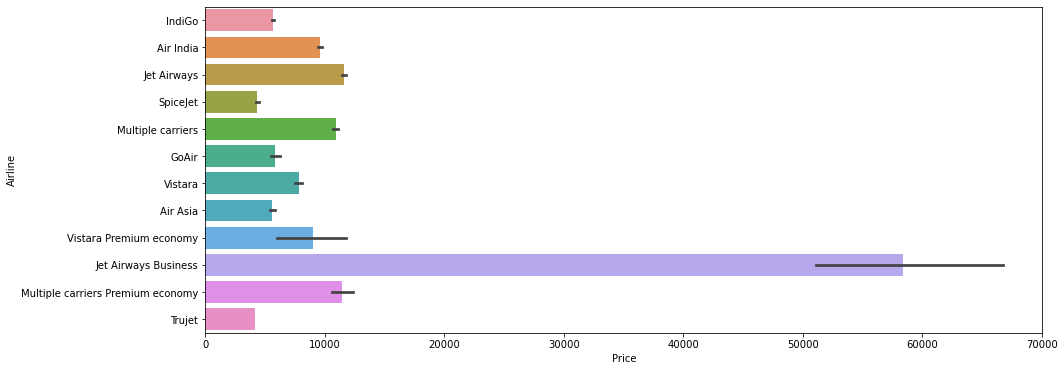

In [17]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Airline', x ='Price', data = data)
plt.show()

From graph we can see the Jet airways business has maximum price than the other airlines.

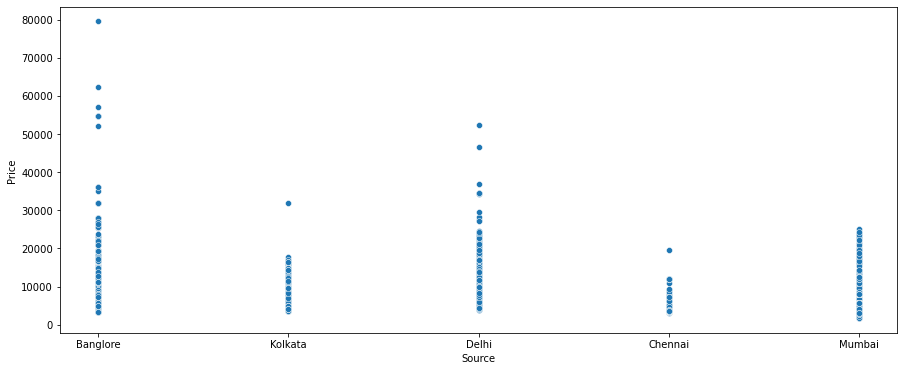

In [18]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.scatterplot(x ='Source', y ='Price', data = data)
plt.show()

The price is higher for the Banglore source from which the service begins.

# EDA

In [19]:
data['Date_of_Journey'].value_counts()

6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
24/06/2019    330
1/06/2019     330
3/06/2019     326
24/03/2019    314
15/06/2019    314
6/03/2019     302
27/03/2019    290
24/05/2019    286
6/05/2019     281
1/05/2019     274
12/05/2019    259
1/04/2019     256
3/03/2019     217
9/03/2019     199
15/03/2019    162
18/03/2019    156
01/03/2019    151
12/03/2019    141
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    100
6/04/2019     100
06/03/2019     95
27/04/2019     94
24/04/2019     92
03/03/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.
For this we require pandas to_datetime to convert object data type to datetime dtype.

In [20]:
# Lets seprate the date column by month & day to visualize the data better
data['Year']=pd.to_datetime(data['Date_of_Journey'])
data['Month']=data['Year'].apply(lambda x:x.month) # Extracting Month
data['Day']=data['Year'].apply(lambda x:x.day)  # Extracting day
data['year']=data['Year'].apply(lambda x:x.year)  # Extracting year

#as we seprated the day month & year we delete date column
data=data.drop(columns=["Date_of_Journey","Year"],axis=1)
data.tail()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month,Day,year
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4,2019
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,4,27,2019
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,4,27,2019
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3,2019
10682,Air India,Delhi,Cochin,10:55,19:15,8h 20m,2 stops,11753,9,5,2019


In [21]:
data['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    202
07:10    201
10:00    196
        ... 
01:35      1
16:25      1
22:25      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

In [22]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
Dep_Time_hours=[] # empty list
Dep_Time_minutes=[] # empty list
for i in data['Dep_Time']:
    hour, minute = i.split(':')
    Dep_Time_hours.append(int(hour)) # Extracting Hours
    Dep_Time_minutes.append(int(minute)) # Extracting minutes

# adding this list as column to our dataset & drop the Dep_Time columns
data['Dep_Time_hours']=Dep_Time_hours
data['Dep_Time_minutes']=Dep_Time_minutes
data=data.drop(columns=["Dep_Time"],axis=1)
data.tail(3)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Month,Day,year,Dep_Time_hours,Dep_Time_minutes
10680,Jet Airways,Banglore,Delhi,11:20,3h,non-stop,7229,4,27,2019,8,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,non-stop,12648,1,3,2019,11,30
10682,Air India,Delhi,Cochin,19:15,8h 20m,2 stops,11753,9,5,2019,10,55


Similarly we can see that in the Arrival_time columns day, month & time are combined so lets seaprate them for the better prediction by using same pandas datetime method

In [23]:
data['Arrival_Time'].value_counts()

19:00           412
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
23:00 22 Apr      1
00:25 28 May      1
00:50 28 May      1
03:35 07 Jun      1
04:35 28 May      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [24]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour

# Extracting Minutes
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
data.drop(["Arrival_Time"], axis = 1, inplace = True)
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,Day,year,Dep_Time_hours,Dep_Time_minutes,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,2019,9,25,4,25


In [25]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

s=pd.to_timedelta(data['Duration'])

# Extracting Hours
data['Duration_hours']=s.dt.components['hours'] 

# Extracting Minutes
data['Duration_minutes']=s.dt.components['minutes']

# Now we can drop Arrival_Time as it is of no use
data.drop(["Duration"], axis = 1, inplace = True)
data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Month,Day,year,Dep_Time_hours,Dep_Time_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0


In [27]:
data.shape

(10462, 14)

# Data preprocessing

In [28]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['Airline', 'Source', 'Destination', 'Total_Stops']

In [29]:
df=pd.get_dummies(data[cat_col], drop_first=True)
df

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10679,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10680,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10681,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [30]:
# lest join the encoded data to our orignal dataset
data=data.join(df)

# Recheck the data after encoding into numerical values
data.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Day,year,Dep_Time_hours,Dep_Time_minutes,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,2019,22,20,...,0,0,0,0,0,1,0,0,0,1
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,...,0,0,0,0,0,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,...,0,1,0,0,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,...,0,0,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,...,0,0,0,0,0,1,0,0,0,0


In [31]:
# Lets drop the orignal categorical columns
data.drop(columns=cat_col,axis=1, inplace=True)
print(data.shape)
data.head()

(10462, 34)


,Price,Month,Day,year,Dep_Time_hours,Dep_Time_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,3897,3,24,2019,22,20,1,10,2,50,...,0,0,0,0,0,1,0,0,0,1
1,7662,1,5,2019,5,50,13,15,7,25,...,0,0,0,0,0,0,1,0,0,0
2,13882,9,6,2019,9,25,4,25,19,0,...,0,1,0,0,0,0,1,0,0,0
3,6218,12,5,2019,18,5,23,30,5,25,...,0,0,0,0,0,0,0,0,0,0
4,13302,1,3,2019,16,50,21,35,4,45,...,0,0,0,0,0,1,0,0,0,0


In [32]:
data.shape

(10462, 34)

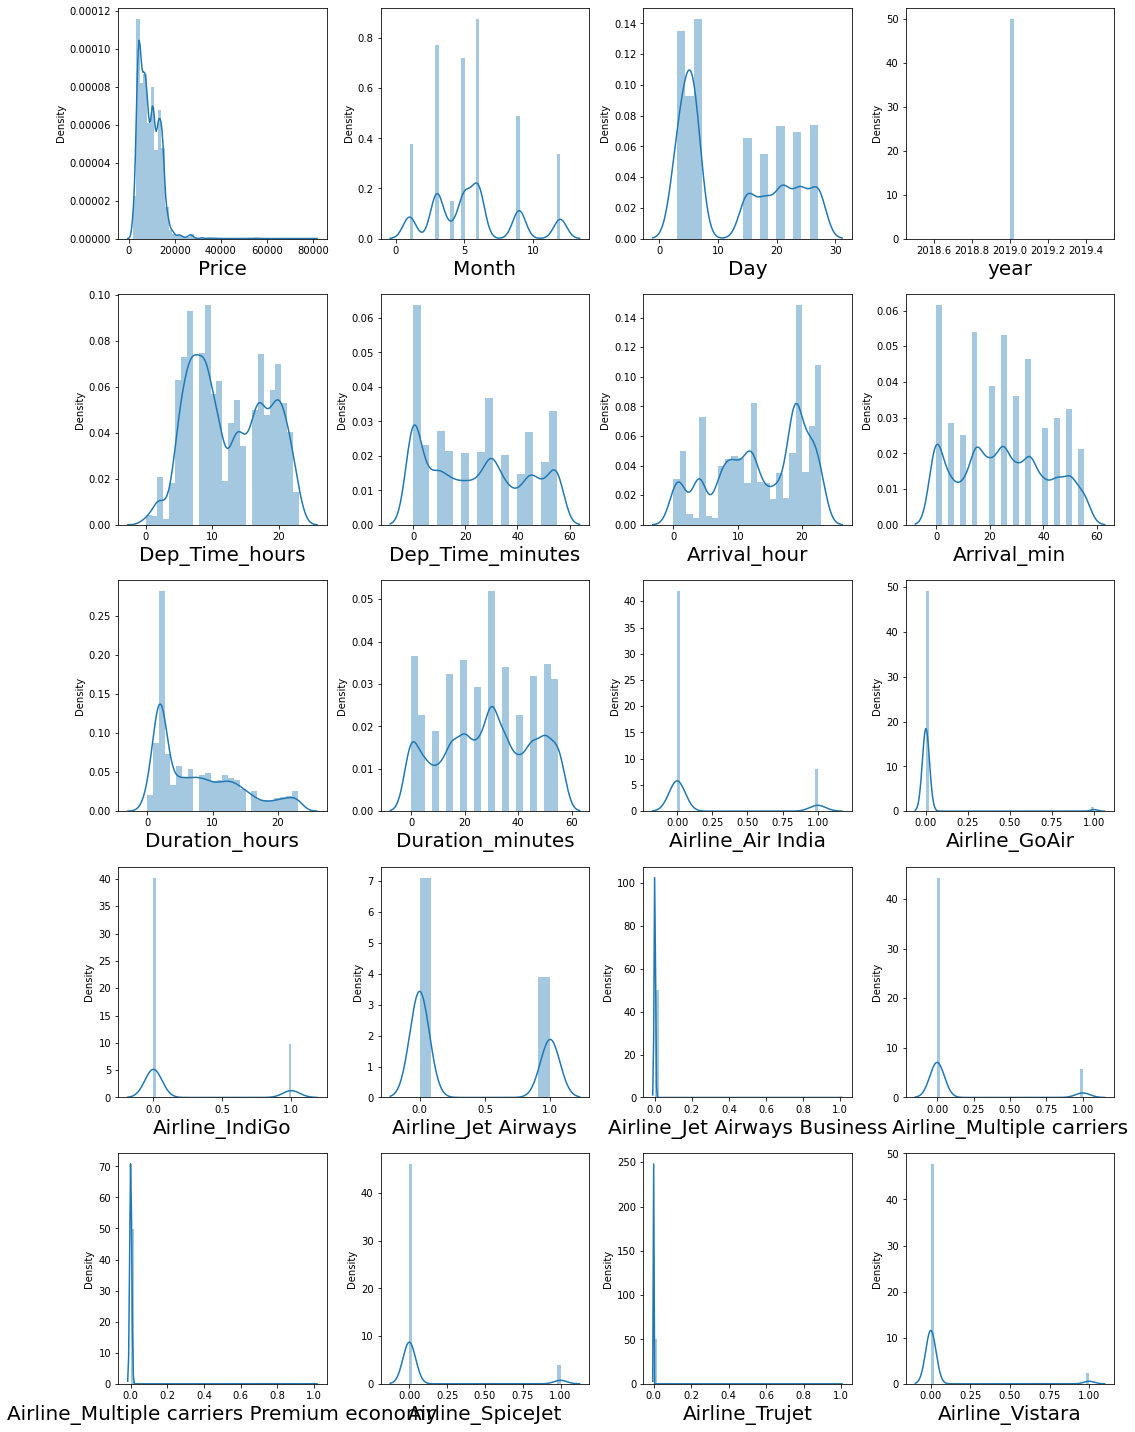

In [33]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

As we see the skewness is present in the price so lets treat it first and for other column we have encoded them so to avoid data loss not treat them 

Lets use advance tech. to remove this skewness using Power transformation

In [34]:
df1=['Price', 'Month', 'Day', 'Dep_Time_hours', 'Dep_Time_minutes',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_minutes']

In [35]:
# Using power transformation to remove skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
data[df1]=pt.fit_transform(data[df1].values)
data[df1] # rechek data

,Price,Month,Day,Dep_Time_hours,Dep_Time_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,-1.354164,-0.816964,1.184055,1.555083,0.026087,-1.793255,-0.773600,-0.952425,1.210280
1,-0.118192,-1.882544,-0.816880,-1.357538,1.176635,-0.063832,-0.430892,0.254081,-0.093930
2,1.097492,1.136374,-0.593206,-0.549680,0.257940,-1.368745,0.156711,1.456462,-1.878907
3,-0.515871,1.842027,-0.816880,0.961234,-0.928853,1.411973,0.419466,-0.108192,-0.093930
4,1.005867,-1.882544,-1.414230,0.649667,1.176635,1.115342,0.667621,-0.334135,0.964765
...,...,...,...,...,...,...,...,...,...
10678,-1.263419,1.136374,-1.083859,1.113114,1.330655,1.263578,0.156711,-0.952425,0.184980
10679,-1.247408,-0.405518,1.336407,1.262620,1.014928,1.411973,-0.124623,-0.952425,0.453274
10680,-0.230455,-0.405518,1.336407,-0.740197,0.026087,-0.356330,-0.124623,-0.606873,-1.878907
10681,0.898520,-1.882544,-1.414230,-0.185701,0.468550,0.082812,-0.773600,-0.952425,0.712763


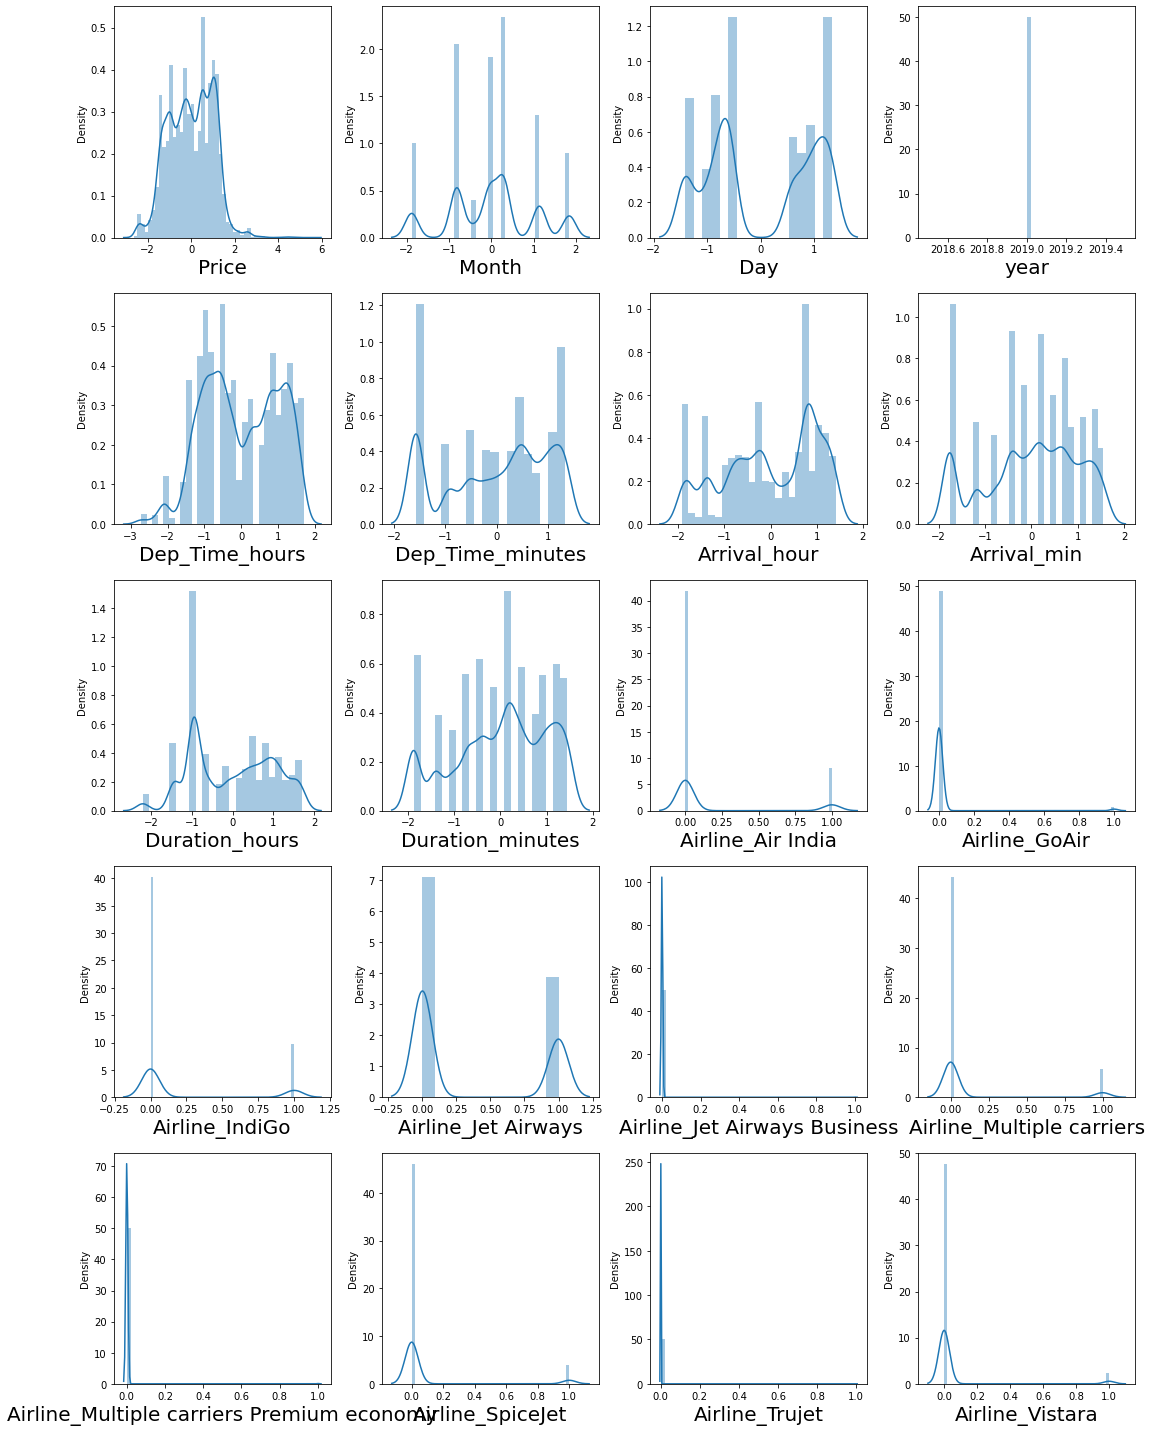

In [36]:
# distribusion after transformation
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Now data looks good lets move further to check multicolinarity by VIF method

In [38]:
data.columns

Index(['Price', 'Month', 'Day', 'year', 'Dep_Time_hours', 'Dep_Time_minutes',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_minutes',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop'],
      dtype='object')

In [102]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data.drop(columns=['Price'])
y=data['Price']

In [103]:
print(x.shape)
print(y.shape)

(10462, 33)
(10462,)


In [104]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [105]:
#check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

         vif                                    featurs
0   1.059504                                      Month
1   1.073763                                        Day
2        NaN                                       year
3   1.065145                             Dep_Time_hours
4   1.116733                           Dep_Time_minutes
5   1.111122                               Arrival_hour
6   1.168254                                Arrival_min
7   2.103612                             Duration_hours
8   1.151842                           Duration_minutes
9   5.946771                          Airline_Air India
10  1.609095                              Airline_GoAir
11  6.225561                             Airline_IndiGo
12  8.880442                        Airline_Jet Airways
13  1.026170               Airline_Jet Airways Business
14  4.938660                  Airline_Multiple carriers
15  1.050472  Airline_Multiple carriers Premium economy
16  3.427975                           Airline_S

NO colinarity in dataset

Lets Use feature selection method to select the best predictors.

In [106]:
from sklearn.feature_selection import SelectPercentile, chi2
# Instantiate with 90% data
sp=SelectPercentile(percentile=90)
SP=sp.fit(x_scaled,y)
cols=SP.get_support(indices=True)
features=x.columns[cols]
df=pd.DataFrame({'features':x.columns,'scores':SP.scores_,'pvalues':SP.pvalues_})
df.sort_values(by='scores',ascending=False)
df

,features,scores,pvalues
0,Month,2.893598,1.795356e-233
1,Day,4.069353,0.000000e+00
2,year,NaN,NaN
3,Dep_Time_hours,2.924998,1.339913e-238
4,Dep_Time_minutes,3.748345,0.000000e+00
5,Arrival_hour,4.669732,0.000000e+00
6,Arrival_min,3.524666,0.000000e+00
7,Duration_hours,9.062980,0.000000e+00
8,Duration_minutes,3.073549,6.100772e-263
9,Airline_Air India,151.036917,0.000000e+00


In [107]:
print(cols)
print(features)
x=data[features]
x

[ 1  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32]
Index(['Day', 'Dep_Time_minutes', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop'],
      dtype='object')


,Day,Dep_Time_minutes,Arrival_hour,Arrival_min,Duration_hours,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,1.184055,0.026087,-1.793255,-0.773600,-0.952425,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,-0.816880,1.176635,-0.063832,-0.430892,0.254081,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.593206,0.257940,-1.368745,0.156711,1.456462,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,-0.816880,-0.928853,1.411973,0.419466,-0.108192,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.414230,1.176635,1.115342,0.667621,-0.334135,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,-1.083859,1.330655,1.263578,0.156711,-0.952425,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10679,1.336407,1.014928,1.411973,-0.124623,-0.952425,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10680,1.336407,0.026087,-0.356330,-0.124623,-0.606873,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
10681,-1.414230,0.468550,0.082812,-0.773600,-0.952425,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Lets Standarised again

In [108]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [109]:
# Lets select the proper random state to build best model by using LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr= RandomForestRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_train)
    pred=lr.predict(x_test)
    print(f"at random sate {i}, the training accuracy is:- {r2_score(y_train,y_pred)}")
    print(f"at random sate {i}, the testing accuracy is:- {r2_score(y_test,pred)}")
    print("\n")

at random sate 0, the training accuracy is:- 0.9327997283693317
at random sate 0, the testing accuracy is:- 0.8192796901230214


at random sate 1, the training accuracy is:- 0.9338703533713089
at random sate 1, the testing accuracy is:- 0.824327237718683


at random sate 2, the training accuracy is:- 0.9354483004226772
at random sate 2, the testing accuracy is:- 0.8165933607776428


at random sate 3, the training accuracy is:- 0.9371214604940824
at random sate 3, the testing accuracy is:- 0.8085422570611747


at random sate 4, the training accuracy is:- 0.9350122555207863
at random sate 4, the testing accuracy is:- 0.8211842527407418


at random sate 5, the training accuracy is:- 0.9328494663492526
at random sate 5, the testing accuracy is:- 0.8228169727716874


at random sate 6, the training accuracy is:- 0.9383418104422483
at random sate 6, the testing accuracy is:- 0.8047961831971966


at random sate 7, the training accuracy is:- 0.9290559433962617
at random sate 7, the testing accu

at random sate 63, the training accuracy is:- 0.9352539201264692
at random sate 63, the testing accuracy is:- 0.8070251092698044


at random sate 64, the training accuracy is:- 0.9327630335953863
at random sate 64, the testing accuracy is:- 0.8198474773217382


at random sate 65, the training accuracy is:- 0.9326470728673
at random sate 65, the testing accuracy is:- 0.8206916219507503


at random sate 66, the training accuracy is:- 0.9321487276872471
at random sate 66, the testing accuracy is:- 0.8301767775321551


at random sate 67, the training accuracy is:- 0.9347310104671527
at random sate 67, the testing accuracy is:- 0.819028883632738


at random sate 68, the training accuracy is:- 0.9345888200190915
at random sate 68, the testing accuracy is:- 0.8195694321805985


at random sate 69, the training accuracy is:- 0.9380771317329987
at random sate 69, the testing accuracy is:- 0.8094079895166978


at random sate 70, the training accuracy is:- 0.9322247636832192
at random sate 70, the

59,97 i m selecting 97 random state so lets train and test by using this RM.

In [110]:
#Lets Split data  again into train & test by using this random state
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=97)

In [111]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7323, 29)
(7323,)
(3139, 29)
(3139,)


# Now lest build the model for Flight Price Prediction 

In [112]:
def print_score(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        print("Train Report:",r2_score(y_train,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",r2_score(y_test,pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
        print("MAE:",mean_absolute_error(y_test,pred))
        print("MSE:",mean_squared_error(y_test,pred))

In [119]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.

from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =15)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [120]:
# Model no.1
from sklearn.ensemble import RandomForestRegressor

rand_regressor= RandomForestRegressor()
rand_regressor.fit(x_train,y_train)

print_score(rand_regressor,x_train,x_test,y_train,y_test,train=True)
print_score(rand_regressor,x_train,x_test,y_train,y_test,train=False)
model_accuracy(rand_regressor)

Train Report: 0.9290908366809753
Test Report: 0.8468925104168339
RMSE: 0.3947643647682564
MAE: 0.2712742602722724
MSE: 0.155838903690885
Accuracy: 80.61 %
Standard Deviation: 1.68 %


In [121]:
# Model no.2
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.9092819059854138
Test Report: 0.8691033762707662
RMSE: 0.3650093141279155
MAE: 0.26246707953987736
MSE: 0.1332317994001313
Accuracy: 82.97 %
Standard Deviation: 1.44 %


In [122]:
#Model no.3
from sklearn.ensemble import GradientBoostingRegressor

gbdt=GradientBoostingRegressor()

gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.8019475875302058
Test Report: 0.8156813357035029
RMSE: 0.4331360998223079
MAE: 0.3334625156083634
MSE: 0.18760688096928027
Accuracy: 78.98 %
Standard Deviation: 2.23 %


In [123]:
#Model no.4
from sklearn.ensemble import BaggingRegressor

bb=BaggingRegressor()

bb.fit(x_train,y_train)

print_score(bb,x_train,x_test,y_train,y_test,train=True)
print_score(bb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(bb)

Train Report: 0.9242133380995474
Test Report: 0.8375043981222662
RMSE: 0.4066872243720473
MAE: 0.27798653260377076
MSE: 0.16539449846743992
Accuracy: 79.40 %
Standard Deviation: 1.79 %


In [124]:
# Model no.5
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

ada.fit(x_train,y_train)

print_score(ada,x_train,x_test,y_train,y_test,train=True)
print_score(ada,x_train,x_test,y_train,y_test,train=False)
model_accuracy(ada)

Train Report: 0.6203406151881122
Test Report: 0.6378183763226088
RMSE: 0.6071596892403195
MAE: 0.5057126803012013
MSE: 0.3686428882384013
Accuracy: 59.80 %
Standard Deviation: 1.64 %


As we seen the in every model there are aorund 3 % least diffrance between test score to accuracy so i m selecting XGBRegressor. no need to hyper tune the parameter.

# Selecting XGB regressor with 82.97 % accuracy

In [125]:
#save model
import pickle
Filename='Finalized_model_Flight_Price.pickle'
pickle.dump(xgb,open(Filename,'wb'))

# Lets work on test dataset for the prediction by selected model

In [126]:
data1=pd.read_excel('Test_set.xlsx')  # read the data
data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [127]:
# check the no. of rows & column & finding the count of missing value
print(data1.shape)
print('*****************************************************************)')
print(data1.isna().sum())
print('*****************************************************************)')
#printing the summary of data type
data1.info() 
print('*****************************************************************)')
#first remove duplicates & recheck the size
data1.drop_duplicates(inplace=True)
print(data1.shape)
print('*****************************************************************)')

# Lets understand data at high level check the stastics of dataset
print(data1.describe(include='all'))
print('*****************************************************************)')

# First lets deal with null values
# As we can not predict rout & total stops lets drop it
data1.dropna(inplace = True)

# Now lets check again for the null values
print(data1.isna().sum())

# Drop unneccesary column
data1=data1.drop(columns=['Additional_Info','Route'],axis=1)

print(data1.shape)

# Lets seprate the date column by month & day to visualize the data better
data1['Year']=pd.to_datetime(data1['Date_of_Journey'])
data1['Month']=data1['Year'].apply(lambda x:x.month) # Extracting Month
data1['Day']=data1['Year'].apply(lambda x:x.day)  # Extracting day
data1['year']=data1['Year'].apply(lambda x:x.year)  # Extracting year

#as we seprated the day month & year we delete date column
data1=data1.drop(columns=["Date_of_Journey","Year"],axis=1)

# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
Dep_Time_hours=[] # empty list
Dep_Time_minutes=[] # empty list
for i in data1['Dep_Time']:
    hour, minute = i.split(':')
    Dep_Time_hours.append(int(hour)) # Extracting Hours
    Dep_Time_minutes.append(int(minute)) # Extracting minutes

# adding this list as column to our dataset & drop the Dep_Time columns
data1['Dep_Time_hours']=Dep_Time_hours
data1['Dep_Time_minutes']=Dep_Time_minutes
data1=data1.drop(columns=["Dep_Time"],axis=1)


# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time
# Extracting Hours
data1["Arrival_hour"] = pd.to_datetime(data1.Arrival_Time).dt.hour
# Extracting Minutes
data1["Arrival_min"] = pd.to_datetime(data1.Arrival_Time).dt.minute
# Now we can drop Arrival_Time as it is of no use
data1.drop(["Arrival_Time"], axis = 1, inplace = True)

# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time
s=pd.to_timedelta(data1['Duration'])
# Extracting Hours
data1['Duration_hours']=s.dt.components['hours'] 
# Extracting Minutes
data1['Duration_minutes']=s.dt.components['minutes']
# Now we can drop Arrival_Time as it is of no use
data1.drop(["Duration"], axis = 1, inplace = True)

# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data1.columns.values.tolist()
for i in features:
    if data1[i].dtype in numerics:
        continue
    cat_col.append(i)

    
#Use encoding method
df=pd.get_dummies(data1[cat_col], drop_first=True)   
# lest join the encoded data to our orignal dataset
data1=data1.join(df)
# Lets drop the orignal categorical columns
data1.drop(columns=cat_col,axis=1, inplace=True)

print(data1.shape)

# Recheck the data after encoding into numerical values
data1.head()

(2671, 10)
*****************************************************************)
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
*****************************************************************)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non

,Month,Day,year,Dep_Time_hours,Dep_Time_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,Airline_Air India,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,6,6,2019,17,30,4,25,10,55,0,...,0,1,0,0,0,0,0,0,0,0
1,12,5,2019,6,20,10,20,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,21,2019,19,15,19,0,23,45,0,...,0,1,0,0,0,0,0,0,0,0
3,5,21,2019,8,0,21,0,13,0,0,...,0,1,0,0,0,0,0,0,0,0
4,6,24,2019,23,55,2,45,2,50,0,...,0,0,1,0,0,0,0,0,0,1


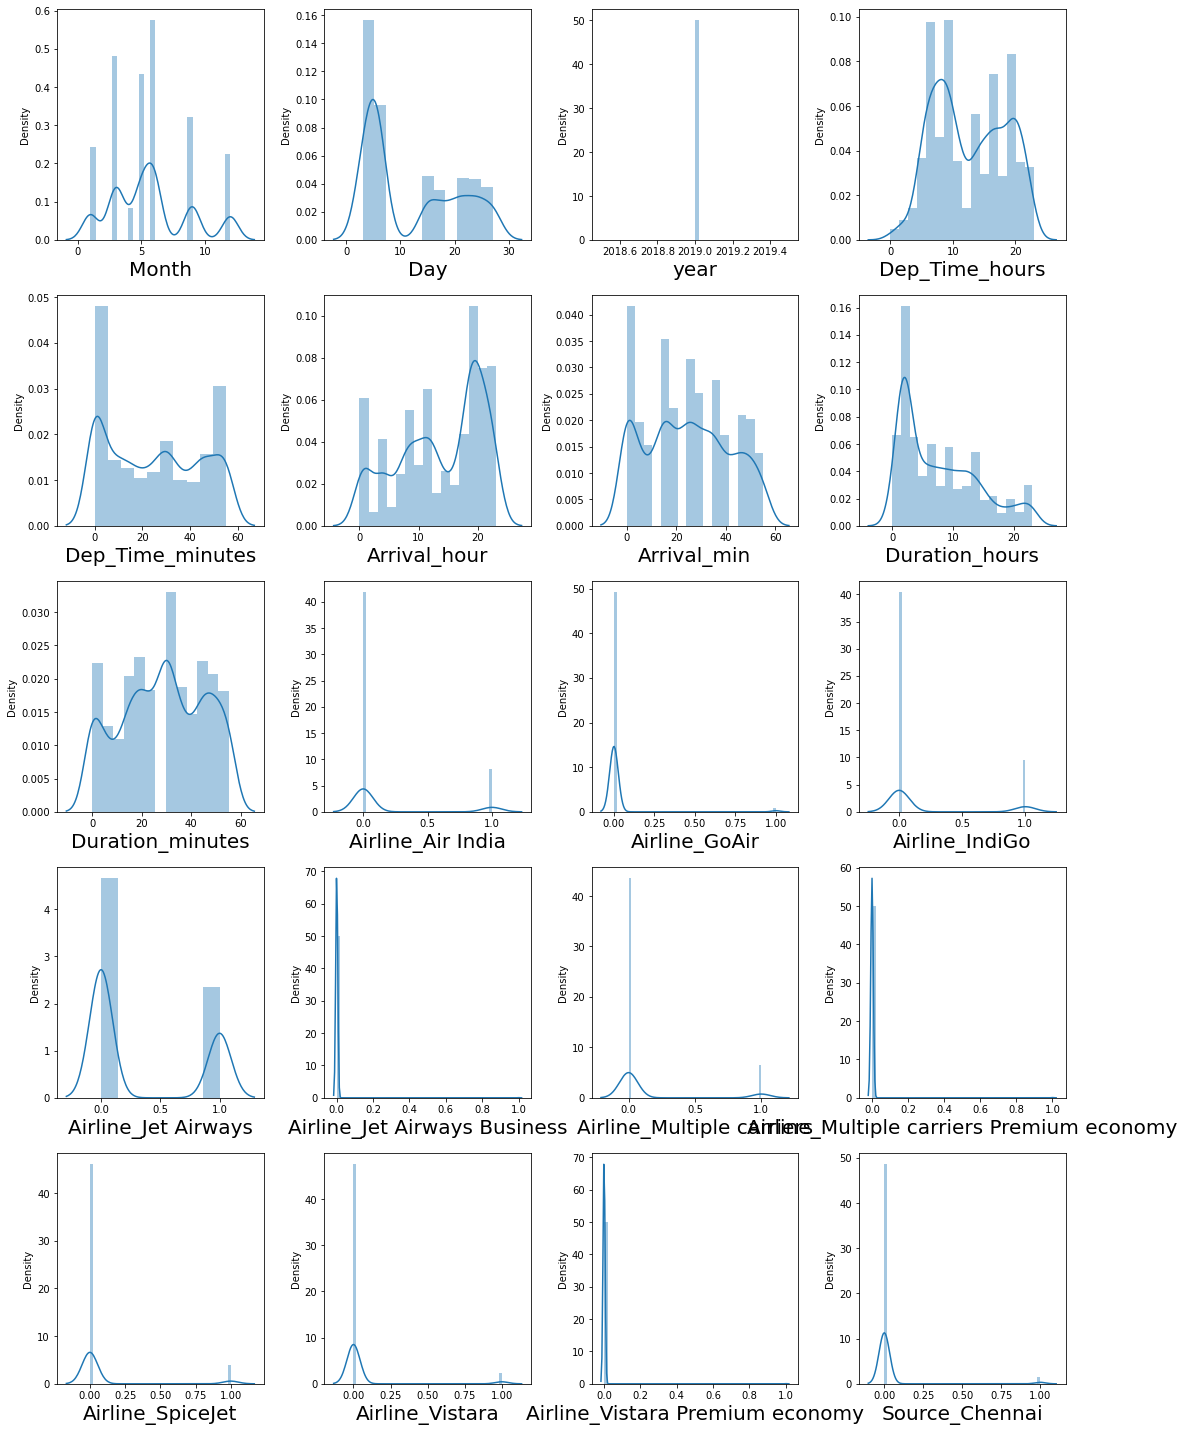

In [128]:
# Now lets check skewness
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data1:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [129]:
df1=['Month', 'Day', 'Dep_Time_hours', 'Dep_Time_minutes',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_minutes']
# Using power transformation to remove skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
data1[df1]=pt.fit_transform(data1[df1].values)
data1[df1] # rechek data

,Month,Day,Dep_Time_hours,Dep_Time_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,0.262668,-0.509525,0.789810,0.443044,-1.366348,0.175484,0.626567,1.465628
1,1.810111,-0.747932,-1.181600,0.004145,-0.530092,-0.099531,-0.380393,-1.891527
2,-0.063782,1.083058,1.101563,-0.254540,0.769727,-1.729864,1.707872,0.969082
3,-0.063782,1.083058,-0.776707,-1.570890,1.063472,-1.729864,0.951472,-1.891527
4,0.262668,1.242803,1.698347,1.300608,-1.635227,1.120096,-0.989934,1.220100
...,...,...,...,...,...,...,...,...
2666,0.262668,-0.509525,1.253890,0.443044,0.916414,0.175484,1.707872,1.465628
2667,-0.827593,1.381620,0.301703,0.004145,0.332077,1.532749,-0.989934,0.447395
2668,0.262668,-1.404893,1.404047,1.147197,-1.366348,0.175484,0.039215,0.447395
2669,0.262668,-1.404893,-1.623503,-1.570890,0.769727,-0.400227,1.134918,-0.716185


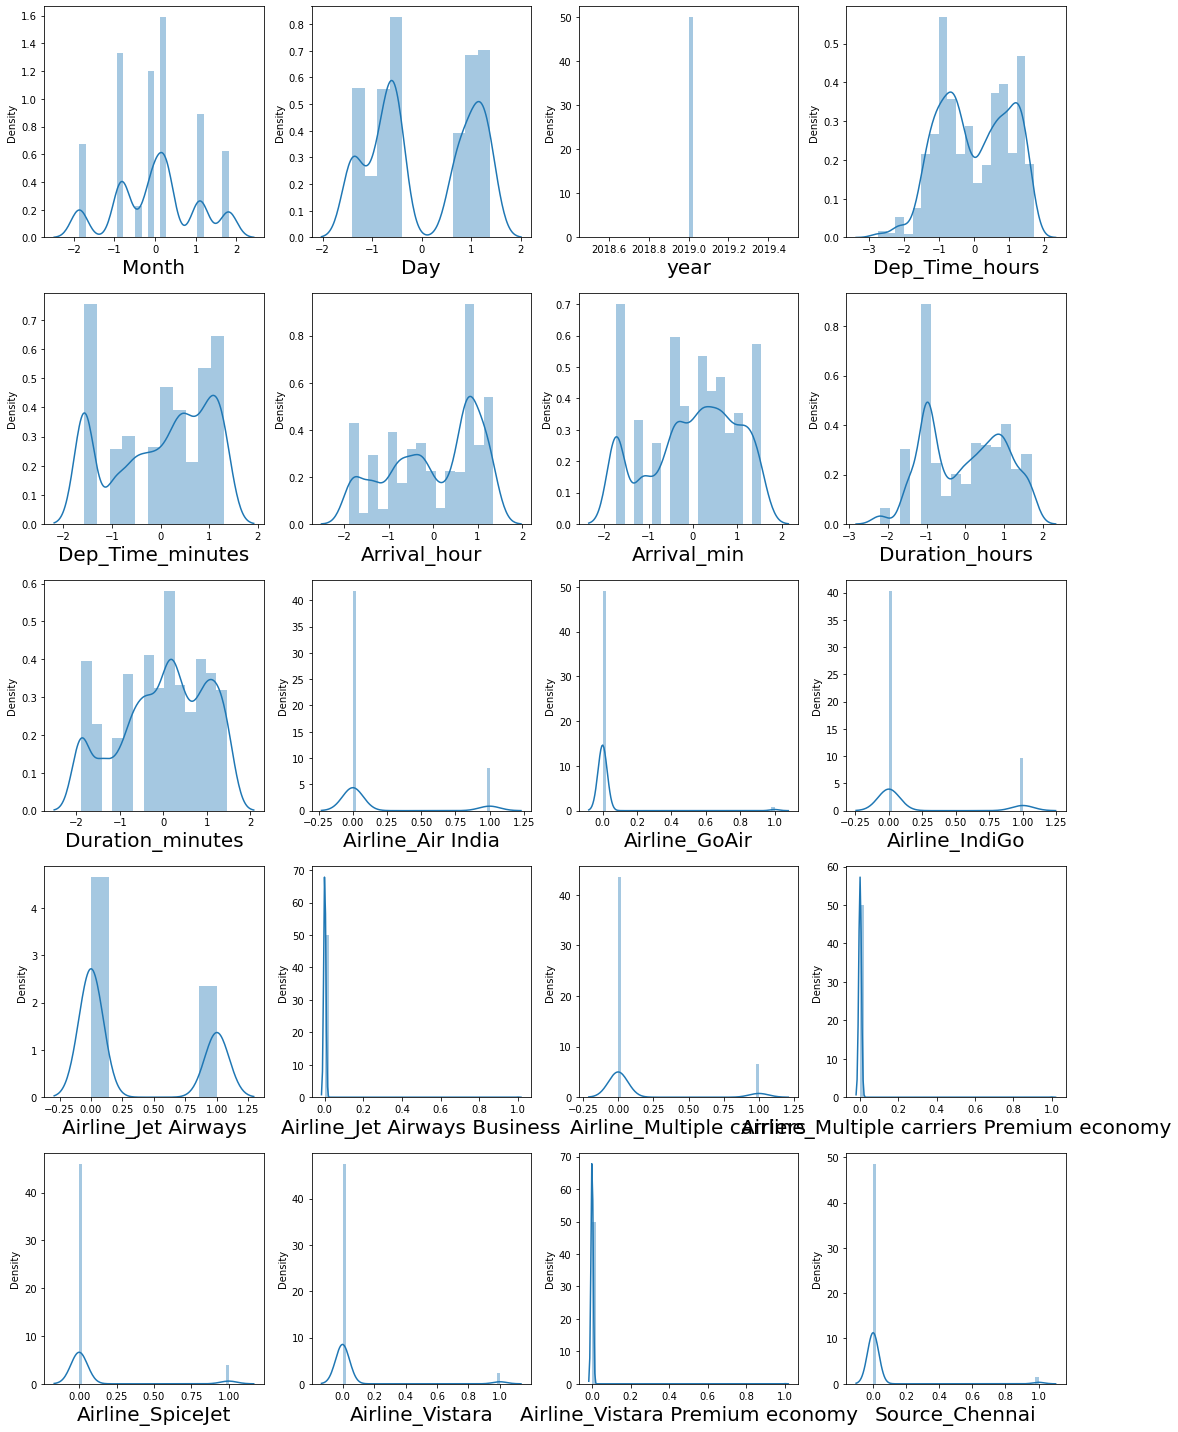

In [130]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in data1:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

now data looks grest let move further for the prediction

In [131]:
data1.head(3)

,Month,Day,year,Dep_Time_hours,Dep_Time_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,Airline_Air India,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,0.262668,-0.509525,2019,0.789810,0.443044,-1.366348,0.175484,0.626567,1.465628,0,...,0,1,0,0,0,0,0,0,0,0
1,1.810111,-0.747932,2019,-1.181600,0.004145,-0.530092,-0.099531,-0.380393,-1.891527,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.063782,1.083058,2019,1.101563,-0.254540,0.769727,-1.729864,1.707872,0.969082,0,...,0,1,0,0,0,0,0,0,0,0


In [132]:
model = open('Finalized_model_Flight_Price.pickle','rb')
xgb = pickle.load(model)

In [149]:
X=data1

In [150]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(X)

In [151]:
#check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=X.columns
print(vif)

         vif                                    featurs
0   1.060359                                      Month
1   1.067260                                        Day
2        NaN                                       year
3   1.082711                             Dep_Time_hours
4   1.106603                           Dep_Time_minutes
5   1.116871                               Arrival_hour
6   1.194822                                Arrival_min
7   2.176513                             Duration_hours
8   1.150344                           Duration_minutes
9   5.704218                          Airline_Air India
10  1.526597                              Airline_GoAir
11  5.857215                             Airline_IndiGo
12  8.280715                        Airline_Jet Airways
13  1.034381               Airline_Jet Airways Business
14  5.173670                  Airline_Multiple carriers
15  1.042824  Airline_Multiple carriers Premium economy
16  3.348230                           Airline_S

No multicolinarity in the columns

#  Lets make prediction on test data by selected model

In [157]:
data1["predictions"]=data1[['Day', 'Dep_Time_minutes', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Month', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop']].apply(lambda s: xgb.predict(s.values[None])[0], axis=1)

In [158]:
data1['predictions']

0       0.743699
1      -1.029631
2       1.166594
3       0.206966
4      -1.328112
          ...   
2666    0.472994
2667   -0.936363
2668    1.340069
2669    0.776489
2670   -0.223110
Name: predictions, Length: 2645, dtype: float64